In [43]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook shows:
1. Run coffea for the SR with BDT cut.
2. Process coffea output for cutflow, signal+bkg yields type processing.
3. Process coffea output for plotting.

If you want to run the analyzer over the signal samples where you select the vertex by the true vertex (gen-matched) instead of the best-chi2 vertex, change the `analysisSubroutines.py` as the following:

- Comment out `routines.selectBestVertex(events)`
- Uncomment the next line `events = routines.selectTrueVertex(events,events.good_vtx)`


### Run Coffea

In [2]:
cuts_config = "../configs/cut_configs/SR_BDT_OneBin_minDxyCut.py"
histos_config = "../configs/histo_configs/BDTvariables.py"
sample_config = "../configs/sample_configs/skimmed_signal/skimmed_signal_v4_2018_aEM.json"

In [5]:
test = Analyzer(sample_config, histos_config, cuts_config) 
t1 = time.time()
out = test.process(execr='futures')
t2 = time.time()
print(f"Runtime: {(t2-t1)/60} minutes")
util.save(out,"signal_SR_BDT.coffea")
del out, test

Output()

Output()

BDT Pass: 1015/1664
BDT Pass: 893/1680
BDT Pass: 3208/4323
BDT Pass: 3648/4830
BDT Pass: 444/720
BDT Pass: 869/1126
BDT Pass: 2685/4228
BDT Pass: 3349/4938
BDT Pass: 293/583
BDT Pass: 966/1484
BDT Pass: 342/559
BDT Pass: 876/1412
BDT Pass: 1323/1770
BDT Pass: 1392/1860
BDT Pass: 225/465
BDT Pass: 178/354
BDT Pass: 820/1222
BDT Pass: 705/1199
BDT Pass: 622/982
BDT Pass: 9/46
BDT Pass: 605/1000
BDT Pass: 48/121
BDT Pass: 108/202
BDT Pass: 18/203
BDT Pass: 33/124
BDT Pass: 31/139
BDT Pass: 202/342
BDT Pass: 345/447
BDT Pass: 76/97
BDT Pass: 286/640
BDT Pass: 650/1038
BDT Pass: 302/531
BDT Pass: 626/1059
BDT Pass: 781/1028
BDT Pass: 708/950
BDT Pass: 269/613
BDT Pass: 514/831
BDT Pass: 471/778
BDT Pass: 127/246
BDT Pass: 542/701
BDT Pass: 509/693
BDT Pass: 156/453
BDT Pass: 429/690
BDT Pass: 334/608
BDT Pass: 454/641
BDT Pass: 478/671
BDT Pass: 68/235
BDT Pass: 175/370
BDT Pass: 252/434
BDT Pass: 42/147
BDT Pass: 231/384
BDT Pass: 285/441
BDT Pass: 392/624
BDT Pass: 64/284
BDT Pass: 2076/2

Runtime: 4.0476361274719235 minutes


In [3]:
bkg_configs = glob.glob("../configs/sample_configs/skimmed_bkg/skimmed_bkg*.json")

print(bkg_configs)

['../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_DY.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_Diboson.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_QCD_TuneCP5_PSWeights.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_TTJetsDiLept.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_Top.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_Triboson.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_WJets.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_ZJets.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_v4_miniAOD.json', '../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_v7_miniAOD.json']


In [4]:
outdir = "./"

In [5]:
for bkg in bkg_configs:
    process = bkg.split('/')[-1].split('.json')[0].split('skimmed_')[-1]
    print(process)

    if 'TTJetsDiLept' in bkg: # currently not available ntuples
        continue

    if 'miniAOD' in bkg:   # currently running on AOD
        continue
    
    test = Analyzer(bkg,histos_config,cuts_config) 
            
    t1 = time.time()
    out = test.process(execr='futures')
    t2 = time.time()
            
    print("Runtime: {:.2f} minutes".format((t2-t1)/60))
    util.save(out,f"{outdir}/{process}_SR_BDT.coffea")
    del out, test

bkg_2018_DY


Output()

Output()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


BDT Pass: 0/1
BDT Pass: 0/2


Runtime: 0.88 minutes
bkg_2018_Diboson


Output()

Output()

BDT Pass: 0/17
BDT Pass: 0/17
BDT Pass: 0/22
BDT Pass: 0/31
BDT Pass: 0/6
BDT Pass: 0/15
BDT Pass: 0/13
BDT Pass: 0/28


Runtime: 0.58 minutes
bkg_2018_QCD_TuneCP5_PSWeights


Output()

Output()

BDT Pass: 0/1
BDT Pass: 0/1


Runtime: 2.40 minutes
bkg_2018_TTJetsDiLept
bkg_2018_Top


Output()

Output()

BDT Pass: 0/7
BDT Pass: 0/4
BDT Pass: 0/1
BDT Pass: 0/4
BDT Pass: 0/1
BDT Pass: 0/4
BDT Pass: 0/5
BDT Pass: 0/1
BDT Pass: 0/6
BDT Pass: 0/5
BDT Pass: 0/6
BDT Pass: 0/5
BDT Pass: 0/3
BDT Pass: 0/1
BDT Pass: 0/4
BDT Pass: 0/6
BDT Pass: 0/6
BDT Pass: 0/9
BDT Pass: 0/2
BDT Pass: 0/5
BDT Pass: 0/7
BDT Pass: 0/3
BDT Pass: 0/2
BDT Pass: 0/1
BDT Pass: 0/3
BDT Pass: 0/2
BDT Pass: 0/2
BDT Pass: 0/15
BDT Pass: 0/6
BDT Pass: 0/9
BDT Pass: 0/11
BDT Pass: 0/2
BDT Pass: 0/1
BDT Pass: 0/4
BDT Pass: 0/2
BDT Pass: 0/5
BDT Pass: 0/4
BDT Pass: 0/6
BDT Pass: 0/8
BDT Pass: 0/2
BDT Pass: 0/4
BDT Pass: 0/2
BDT Pass: 0/5
BDT Pass: 0/14
BDT Pass: 0/9
BDT Pass: 0/3
BDT Pass: 0/2
BDT Pass: 0/1
BDT Pass: 0/9
BDT Pass: 0/2
BDT Pass: 0/2
BDT Pass: 0/2
BDT Pass: 0/3
BDT Pass: 0/5
BDT Pass: 0/9
BDT Pass: 0/6
BDT Pass: 0/3
BDT Pass: 0/1
BDT Pass: 0/3
BDT Pass: 0/2
BDT Pass: 0/4
BDT Pass: 0/7
BDT Pass: 0/11
BDT Pass: 0/8
BDT Pass: 0/4
BDT Pass: 0/2
BDT Pass: 0/3
BDT Pass: 0/1
BDT Pass: 0/2
BDT Pass: 0/1
BDT Pass: 0/2
BD

Runtime: 3.95 minutes
bkg_2018_Triboson


Output()

Output()

BDT Pass: 0/5
BDT Pass: 0/3
BDT Pass: 0/4
BDT Pass: 0/1


Runtime: 0.28 minutes
bkg_2018_WJets


Output()

Output()

BDT Pass: 0/6
BDT Pass: 1/91
BDT Pass: 1/88
BDT Pass: 0/17
BDT Pass: 0/15
BDT Pass: 0/61
BDT Pass: 0/47
BDT Pass: 0/40
BDT Pass: 0/43
BDT Pass: 0/44
BDT Pass: 0/16
BDT Pass: 0/34
BDT Pass: 0/25
BDT Pass: 0/20
BDT Pass: 1/95
BDT Pass: 1/204
BDT Pass: 1/61
BDT Pass: 0/44
BDT Pass: 0/183
BDT Pass: 0/56
BDT Pass: 0/67
BDT Pass: 0/51
BDT Pass: 0/67
BDT Pass: 3/243
BDT Pass: 4/400
BDT Pass: 2/499
BDT Pass: 0/144
BDT Pass: 5/496
BDT Pass: 2/62
BDT Pass: 0/52
BDT Pass: 0/50
BDT Pass: 0/67
BDT Pass: 0/249
BDT Pass: 1/43
BDT Pass: 0/34
BDT Pass: 3/509
BDT Pass: 2/443
BDT Pass: 1/25
BDT Pass: 0/75
BDT Pass: 1/109
BDT Pass: 1/47
BDT Pass: 0/59


Runtime: 3.07 minutes
bkg_2018_ZJets


Output()

Output()

BDT Pass: 0/11
BDT Pass: 1/128
BDT Pass: 0/129
BDT Pass: 0/51
BDT Pass: 0/80
BDT Pass: 0/89
BDT Pass: 0/62
BDT Pass: 2/596
BDT Pass: 2/860
BDT Pass: 1/1407
BDT Pass: 1/1428
BDT Pass: 0/2
BDT Pass: 1/1100
BDT Pass: 3/654
BDT Pass: 0/684
BDT Pass: 0/126
BDT Pass: 0/564
BDT Pass: 1/557
BDT Pass: 1/255
BDT Pass: 3/867
BDT Pass: 1/752
BDT Pass: 2/796


Runtime: 3.05 minutes
bkg_2018_v4_miniAOD


Output()

Output()

BDT Pass: 0/160
BDT Pass: 3/682
BDT Pass: 0/4
BDT Pass: 11/1948
BDT Pass: 14/1993
BDT Pass: 0/11



KeyboardInterrupt



BDT Pass: 0/15
BDT Pass: 12/823
BDT Pass: 3/425
BDT Pass: 0/209
BDT Pass: 1/124
BDT Pass: 37/3100
BDT Pass: 0/115
BDT Pass: 1/30
BDT Pass: 3/37
BDT Pass: 2/39
BDT Pass: 1/68
BDT Pass: 1/52
BDT Pass: 32/2907
BDT Pass: 1/44
BDT Pass: 2/41
BDT Pass: 0/54
BDT Pass: 3/67
BDT Pass: 4/68
BDT Pass: 7/55
BDT Pass: 1/64
BDT Pass: 3/57
BDT Pass: 1/61
BDT Pass: 0/15
BDT Pass: 4/23
BDT Pass: 0/1
BDT Pass: 0/1
BDT Pass: 0/7
BDT Pass: 1/31
BDT Pass: 0/4
BDT Pass: 3/99
BDT Pass: 0/16
BDT Pass: 0/9
BDT Pass: 0/93
BDT Pass: 1/6
BDT Pass: 0/3
BDT Pass: 0/8


### Process Coffea Output: Some General Info from the Coffea File

In [6]:
prefix = './'
suffix = '_SR_BDT'

In [8]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [7]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

#### List of points / processes from the coffea output

In [26]:
si = utils.get_signal_point_dict(sig_histo)
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,88.0,16.0,100.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-100
...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.5,1.0,10.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10


In [17]:
utils.get_bkg_point_dict(bkg_histos)

,Process
bkg_2018_QCD_HT700to1000,QCD
bkg_2018_QCD_HT500to700,QCD
bkg_2018_QCD_HT1500to2000,QCD
bkg_2018_QCD_HT1000to1500,QCD
bkg_2018_QCD_HT300to500,QCD
bkg_2018_QCD_HT2000toInf,QCD
bkg_2018_ST_s-channel,Top
bkg_2018_ST_t-channel_antitop,Top
bkg_2018_ST_t-channel_top,Top
bkg_2018_ST_tW_top,Top


#### List of histograms in the coffea output

In [14]:
utils.get_signal_list_of_histograms(sig_histo)

['bdt_score',
 'sel_vtx_vxy',
 'sel_vtx_vxy_projected',
 'sel_vtx_minDxy',
 'sel_vtx_dxy1',
 'sel_vtx_dxy2',
 'sel_vtx_minDz',
 'sel_vtx_deltaDxy',
 'sel_vtx_deltaDz',
 'sel_vtx_vxySignif',
 'sel_vtx_type',
 'sel_vtx_matchType',
 'sel_vtx_dR_zoom',
 'sel_vtx_chi2',
 'sel_vtx_dR',
 'sel_vtx_dEta',
 'sel_vtx_dPhi',
 'sel_vtx_sign_eta',
 'sel_vtx_prod_eta',
 'sel_vtx_METdPhi',
 'sel_vtx_pt',
 'sel_vtx_eta',
 'sel_vtx_phi',
 'sel_vtx_mass',
 'sel_vtx_pt_e1_over_pt_e2',
 'delta_dxy_over_mindxy',
 'delta_dxy_over_maxdxy',
 'delta_dxy_over_meandxy',
 'sel_vtx_pt_over_m',
 'sel_vtx_dEta_over_dPhi',
 'sel_vtx_log_dEta_over_dPhi',
 'nLpt_Electron',
 'nPF_Electron',
 'nElectron',
 'nGoodVtx',
 'met_over_lead_jet_pt',
 'ctau',
 'cos_collinear',
 'projectedLxy',
 'abs_cos_collinear',
 'ctau_vs_Lxy',
 'sel_vtx_vxy_vs_mindxy',
 'sel_vtx_vxy_vs_matchType',
 'sel_vtx_vxy_vs_sel_vtx_chi2',
 'sel_vtx_vxy_vs_sel_vtx_dR',
 'sel_vtx_vxy_vs_sel_vtx_mass',
 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
 'sel_vtx_vxy_vs_s

#### List of cuts in the signal coffea output

In [21]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = True)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


['all',
 'hasVtx',
 'cut4',
 'cut5',
 'cut6',
 'cut7',
 'cut8',
 'cut9',
 'cut10',
 'cut11']

In [22]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = False)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

In [18]:
utils.get_bkg_list_of_cuts(bkg_histos)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

### Process SIGNAL Coffea Output: Cutflow & Yields

#### Efficiency cutflow

In [25]:
utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.042940,0.005995,0.005995,0.005063,0.004896,0.004892,0.004892,0.004715,0.003069,0.001872
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.041015,0.004814,0.004814,0.004086,0.003980,0.003979,0.003979,0.003889,0.002277,0.001210
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.073536,0.022607,0.022607,0.019257,0.018700,0.018696,0.018696,0.018507,0.008765,0.006504
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.064370,0.015743,0.015743,0.013400,0.012993,0.012986,0.012986,0.012779,0.009090,0.006866
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.038229,0.005134,0.005134,0.004414,0.004249,0.004245,0.004245,0.004080,0.002590,0.001597
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.011907,0.001245,0.001245,0.001060,0.000999,0.000999,0.000999,0.000970,0.000502,0.000207
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.015441,0.002173,0.002173,0.001880,0.001748,0.001746,0.001746,0.001733,0.000735,0.000358
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.045460,0.005572,0.005572,0.004704,0.004563,0.004562,0.004562,0.004453,0.002650,0.001455
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,0.066869,0.012481,0.012481,0.010739,0.010433,0.010433,0.010433,0.010315,0.006867,0.004631


#### Weighted Event Count cutflow

In [29]:
utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.000600,0.000084,0.000084,0.000071,0.000068,0.000068,0.000068,0.000066,0.000043,0.000026
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,68.297623,8.016993,8.016993,6.803361,6.627413,6.625154,6.625154,6.476220,3.791018,2.015132
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.102833,0.031613,0.031613,0.026929,0.026150,0.026144,0.026144,0.025880,0.012256,0.009095
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.009000,0.002201,0.002201,0.001874,0.001817,0.001816,0.001816,0.001787,0.001271,0.000960
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.000792,0.000106,0.000106,0.000091,0.000088,0.000088,0.000088,0.000085,0.000054,0.000033
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,570.838745,59.685029,59.685029,50.818480,47.914749,47.914749,47.914749,46.499885,24.068467,9.909202
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,2547.922922,358.528763,358.528763,310.166027,288.469139,288.111663,288.111663,285.982687,121.322777,59.066711
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,61.402103,7.526005,7.526005,6.353867,6.163021,6.161291,6.161291,6.013923,3.579253,1.964918
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,121.837797,22.740931,22.740931,19.565976,19.009917,19.009917,19.009917,18.793932,12.512106,8.438711


#### Raw Event Count cutflow

In [30]:
utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,23278,3250,3250,2745,2654,2652,2652,2556,1664,1015
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,30269,3553,3553,3015,2937,2936,2936,2870,1680,893
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,36268,11150,11150,9498,9223,9221,9221,9128,4323,3208
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,34204,8365,8365,7120,6904,6900,6900,6790,4830,3648
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,10627,1427,1427,1227,1181,1180,1180,1134,720,444
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,7660,801,801,682,643,643,643,624,323,133
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,7164,1008,1008,872,811,810,810,804,341,166
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,35409,4340,4340,3664,3554,3553,3553,3468,2064,1133
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,45134,8424,8424,7248,7042,7042,7042,6962,4635,3126


#### Vertex Purity cutflow

In [31]:
utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.0,0.601507,0.601507,0.609438,0.610743,0.611205,0.611205,0.626343,0.774618,0.990152
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.0,0.473123,0.473123,0.483264,0.485536,0.485701,0.485701,0.492694,0.680357,0.988820
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0,0.908880,0.908880,0.912622,0.913160,0.913141,0.913141,0.914773,0.938472,0.994698
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.0,0.854278,0.854278,0.859268,0.861097,0.861307,0.861307,0.863776,0.927749,0.995336
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,1.0,0.585158,0.585158,0.595763,0.596118,0.596622,0.596622,0.615542,0.773632,0.995502
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,1.0,0.469374,0.469374,0.470609,0.474275,0.474275,0.474275,0.480695,0.640801,0.984964
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.0,0.636992,0.636992,0.633135,0.633911,0.633457,0.633457,0.634448,0.744902,0.993992
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0,0.487144,0.487144,0.501416,0.501743,0.501884,0.501884,0.509567,0.707874,0.993821
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,1.0,0.764131,0.764131,0.766010,0.765697,0.765697,0.765697,0.766592,0.857625,0.993604


#### Save the cutflow table for some chosen points

In [32]:
ct = 1.0
delta = 0.1

points = (si["ctau"] == ct) & (si["delta"] == delta)

table = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

df = table.loc[list(si[points].name)]
df

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,0.069469,0.015265,0.015265,0.013049,0.012632,0.012628,0.012628,0.012513,0.005640,0.003582
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,0.060691,0.012979,0.012979,0.011187,0.010795,0.010792,0.010792,0.010711,0.004729,0.002934
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,0.053240,0.010559,0.010559,0.008952,0.008713,0.008713,0.008713,0.008624,0.003939,0.002316
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,0.044809,0.008682,0.008682,0.007384,0.007083,0.007083,0.007083,0.007008,0.003270,0.001978
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,0.013839,0.001680,0.001680,0.001507,0.001444,0.001444,0.001444,0.001431,0.000553,0.000147
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,0.037325,0.006925,0.006925,0.005968,0.005759,0.005757,0.005757,0.005730,0.002633,0.001557
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,0.030884,0.005473,0.005473,0.004675,0.004466,0.004458,0.004458,0.004425,0.002010,0.001217
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,0.023415,0.003714,0.003714,0.003204,0.003095,0.003095,0.003095,0.003075,0.001404,0.000771
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,0.018915,0.002881,0.002881,0.002429,0.002320,0.002315,0.002315,0.002294,0.001027,0.000597
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.015441,0.002173,0.002173,0.001880,0.001748,0.001746,0.001746,0.001733,0.000735,0.000358


In [49]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Signal_ctau-{int(ct)}_delta-{delta}_samples_Efficiency'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Signal_ctau-1_delta-0.1_samples_Efficiency.csv


#### Plot the cutflow of chosen points

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}
{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


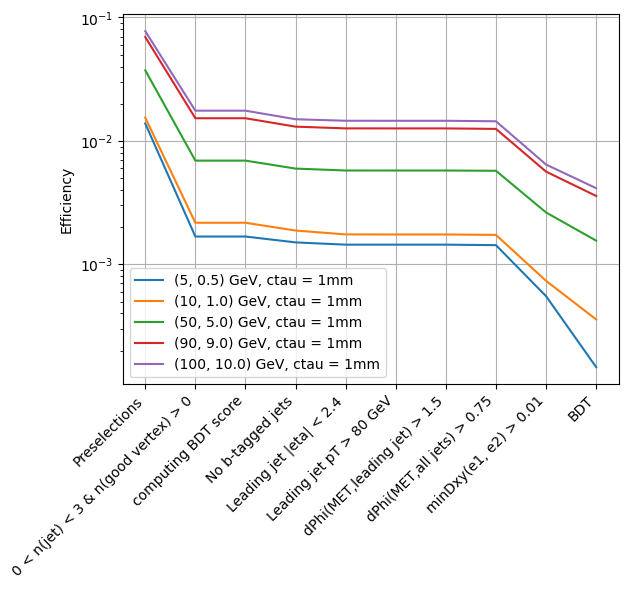

In [41]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

m1s = [5, 10, 50, 90, 100]
deltas = [0.1]
ctaus = [1]

ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Efficiency', title = '')

### Process BACKGROUND Coffea Output: Cutflow & Yields

#### Efficiency cutflow

In [44]:
pd.options.display.float_format = '{:,.6f}'.format
utils.get_bkg_cutflow_df(bkg_histos, 'cutflow')

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Top,0.000129,0.000013,0.000013,0.000008,0.000007,0.000007,0.000007,0.000007,0.000001,0.000000
DY,0.000011,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,0.000000
Diboson,0.000637,0.000044,0.000044,0.000033,0.000031,0.000030,0.000030,0.000027,0.000005,0.000000
Triboson,0.001933,0.000158,0.000158,0.000104,0.000092,0.000091,0.000091,0.000076,0.000015,0.000000
W+jets,0.002310,0.000173,0.000173,0.000139,0.000132,0.000131,0.000131,0.000114,0.000020,0.000000
Z+jets,0.006645,0.000398,0.000398,0.000325,0.000310,0.000309,0.000309,0.000292,0.000073,0.000000
Total,0.000019,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Weighted Event Count cutflow

In [46]:
pd.options.display.float_format = '{:,.2f}'.format
utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,"38,039.83","1,882.67","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25,320.05,0.00
Top,"5,667.49",559.22,559.22,349.76,314.03,312.99,312.95,294.00,34.52,0.00
DY,"14,495.72","2,373.75","2,373.75","2,325.57","2,325.57","2,325.57","2,325.57","2,157.97","1,750.49",0.00
Diboson,"4,424.20",307.91,307.91,227.24,213.36,211.27,210.33,189.35,36.30,0.00
Triboson,53.00,4.32,4.32,2.85,2.51,2.51,2.50,2.09,0.40,0.00
W+jets,"227,212.60","17,009.81","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39","1,918.22",9.30
Z+jets,"142,220.15","8,524.55","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76","1,561.49",2.31
Total,"432,113.00","30,662.23","30,662.23","24,835.58","23,737.17","23,695.95","23,689.22","20,736.81","5,621.48",11.62


#### Raw Event Count cutflow

In [47]:
pd.options.display.float_format = '{:,.0f}'.format
utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,12311,381,381,160,159,159,158,3,2,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,353,0
DY,205,14,14,12,12,12,12,10,3,0
Diboson,18067,1234,1234,915,860,852,848,767,149,0
Triboson,2257,170,170,116,106,105,104,92,13,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,4981,30
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,11198,19
Total,2061774,122339,122339,93903,89943,89814,89738,76448,16699,49


#### Raw and Weighted Counts of Background Composition

In [57]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

In [58]:
nBkg = bkg_cts_df.loc['Total'][-1]
print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 11.62


In [59]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['BDT']).transpose(), pd.DataFrame(bkg_cts_raw_df['BDT']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,Total
Weighted Counts,0.00,0.00,0.00,0.00,0.00,9.30,2.31,11.62
Raw Counts,0.00,0.00,0.00,0.00,0.00,30.00,19.00,49.00


#### Save the cutflow table

In [51]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_Background_WeightedCounts'

df_to_save = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_Background_WeightedCounts.csv


#### Plot the cutflow

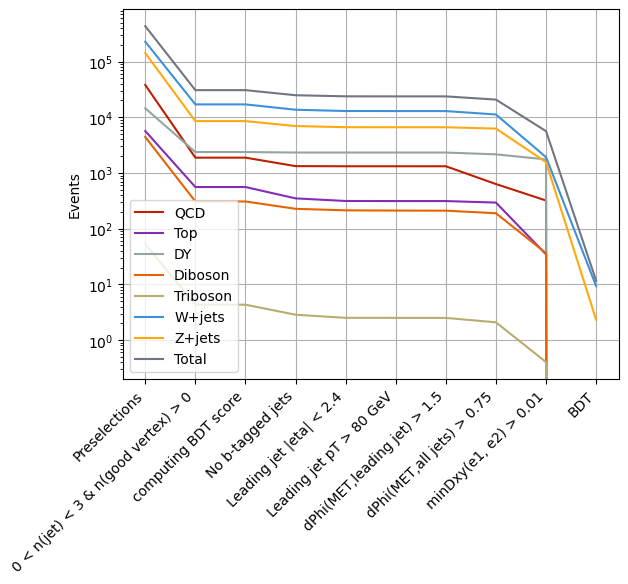

In [54]:
df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

ptools.plot_bkg_efficiency(bkg_histos, df, doLog = True, ylabel = 'Events', title = '')

### Process SIGNAL and BACKGROUND coffea outputs for S/sqrt(B)

In [60]:
nBkg

11.617713863700969

In [65]:
table = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.0006,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,68.2976,8.0170,8.0170,6.8034,6.6274,6.6252,6.6252,6.4762,3.7910,2.0151
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.1028,0.0316,0.0316,0.0269,0.0261,0.0261,0.0261,0.0259,0.0123,0.0091
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.0090,0.0022,0.0022,0.0019,0.0018,0.0018,0.0018,0.0018,0.0013,0.0010
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.0008,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000
...,...,...,...,...,...,...,...,...,...,...
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,570.8387,59.6850,59.6850,50.8185,47.9147,47.9147,47.9147,46.4999,24.0685,9.9092
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,"2,547.9229",358.5288,358.5288,310.1660,288.4691,288.1117,288.1117,285.9827,121.3228,59.0667
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,61.4021,7.5260,7.5260,6.3539,6.1630,6.1613,6.1613,6.0139,3.5793,1.9649
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,121.8378,22.7409,22.7409,19.5660,19.0099,19.0099,19.0099,18.7939,12.5121,8.4387


In [62]:
pd.options.display.float_format = '{:,.4f}'.format

In [67]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


In [68]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut

m1_list = []
delta_list = []
ctau_list = []

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1_list.append(sig_dict['m1'])
    delta_list.append(sig_dict['delta'])
    ctau_list.append(sig_dict['ctau'])

df['m1'] = m1_list
df['delta'] = delta_list
df['ctau'] = ctau_list

df = df.sort_values(by=['m1']) # sort by m1

In [69]:
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,37.1131,5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.4573,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.2668,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,4.5329,5.0000,0.1000,10.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,0.0224,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.0008,100.0000,0.2000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,0.0069,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.9649,100.0000,0.1000,100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,8.4387,100.0000,0.1000,10.0000


In [70]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [71]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df

,Signal,m1,delta,ctau,Background
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,37.1131,5.0000,0.1000,1.0000,11.6177
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.4573,5.0000,0.2000,1.0000,11.6177
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.2668,5.0000,0.1000,100.0000,11.6177
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,4.5329,5.0000,0.1000,10.0000,11.6177
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,0.0224,5.0000,0.2000,10.0000,11.6177
...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,0.0069,100.0000,0.2000,1.0000,11.6177
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.9649,100.0000,0.1000,100.0000,11.6177
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,8.4387,100.0000,0.1000,10.0000,11.6177
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,23.8694,100.0000,0.1000,1.0000,11.6177


In [72]:
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]
df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,37.1131,11.6177,10.8885
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,0.4573,11.6177,0.1342
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,0.2668,11.6177,0.0783
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,4.5329,11.6177,1.3299
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,0.0224,11.6177,0.0066
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,0.0069,11.6177,0.0020
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,1.9649,11.6177,0.5765
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,8.4387,11.6177,2.4758
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,23.8694,11.6177,7.0030


In [74]:
outdir = './csv/SR_Yields/'
outname = f'SR_BDT_S_over_sqrtB'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_BDT_S_over_sqrtB.csv


#### Check S/sqrt(B) for given signal points

In [76]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 10mm, delta = 0.1
ct = 10
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,4.5329,11.6177,1.3299
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,9.9092,11.6177,2.9072
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,13.9538,11.6177,4.0939
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,23.1796,11.6177,6.8006
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,66.7569,11.6177,19.5856
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,32.1031,11.6177,9.4186
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,15.4016,11.6177,4.5186
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,13.1883,11.6177,3.8693
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,10.8399,11.6177,3.1803
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,9.6256,11.6177,2.8240


### Plot kinematics: 1D

In [78]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx=True)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


['all',
 'hasVtx',
 'cut4',
 'cut5',
 'cut6',
 'cut7',
 'cut8',
 'cut9',
 'cut10',
 'cut11']

In [79]:
utils.get_signal_list_of_cuts(sig_histo, get_cut_idx=False)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "minDxy(e1, e2) > 0.01",
    "cut11": "BDT"
}


['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

In [80]:
utils.get_signal_list_of_histograms(sig_histo)

['bdt_score',
 'sel_vtx_vxy',
 'sel_vtx_vxy_projected',
 'sel_vtx_minDxy',
 'sel_vtx_dxy1',
 'sel_vtx_dxy2',
 'sel_vtx_minDz',
 'sel_vtx_deltaDxy',
 'sel_vtx_deltaDz',
 'sel_vtx_vxySignif',
 'sel_vtx_type',
 'sel_vtx_matchType',
 'sel_vtx_dR_zoom',
 'sel_vtx_chi2',
 'sel_vtx_dR',
 'sel_vtx_dEta',
 'sel_vtx_dPhi',
 'sel_vtx_sign_eta',
 'sel_vtx_prod_eta',
 'sel_vtx_METdPhi',
 'sel_vtx_pt',
 'sel_vtx_eta',
 'sel_vtx_phi',
 'sel_vtx_mass',
 'sel_vtx_pt_e1_over_pt_e2',
 'delta_dxy_over_mindxy',
 'delta_dxy_over_maxdxy',
 'delta_dxy_over_meandxy',
 'sel_vtx_pt_over_m',
 'sel_vtx_dEta_over_dPhi',
 'sel_vtx_log_dEta_over_dPhi',
 'nLpt_Electron',
 'nPF_Electron',
 'nElectron',
 'nGoodVtx',
 'met_over_lead_jet_pt',
 'ctau',
 'cos_collinear',
 'projectedLxy',
 'abs_cos_collinear',
 'ctau_vs_Lxy',
 'sel_vtx_vxy_vs_mindxy',
 'sel_vtx_vxy_vs_matchType',
 'sel_vtx_vxy_vs_sel_vtx_chi2',
 'sel_vtx_vxy_vs_sel_vtx_dR',
 'sel_vtx_vxy_vs_sel_vtx_mass',
 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
 'sel_vtx_vxy_vs_s

#### sel_vtx_m

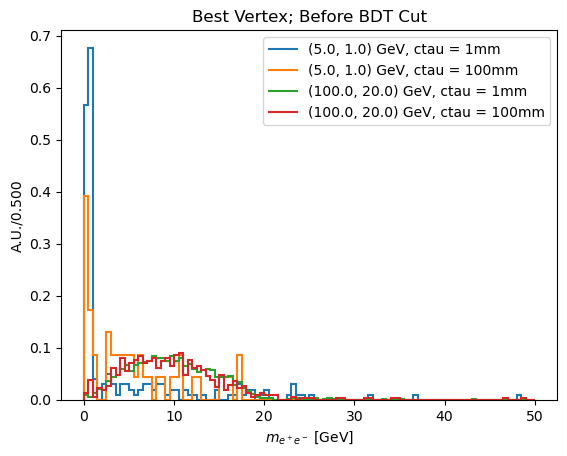

In [86]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best Vertex; Before BDT Cut')
plt.legend()
plt.show()

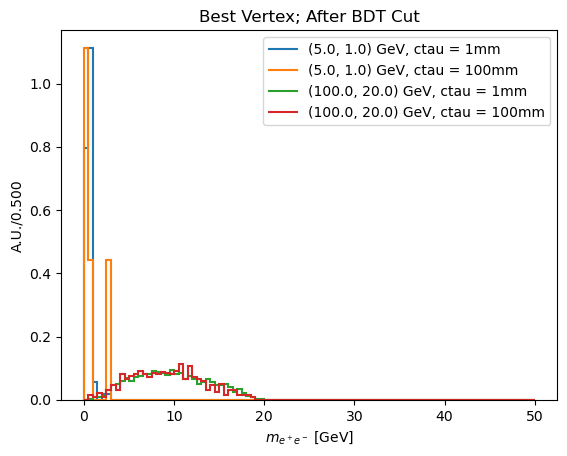

In [87]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut11',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best Vertex; After BDT Cut')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Before BDT Cut')

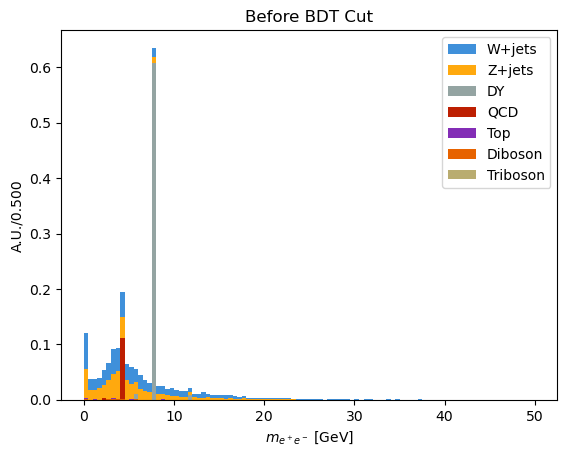

In [93]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

plt.title('Before BDT Cut')

##### Plot only chosen background processes

Text(0.5, 1.0, 'W+jets, Z+jets, Top; Before BDT Cut')

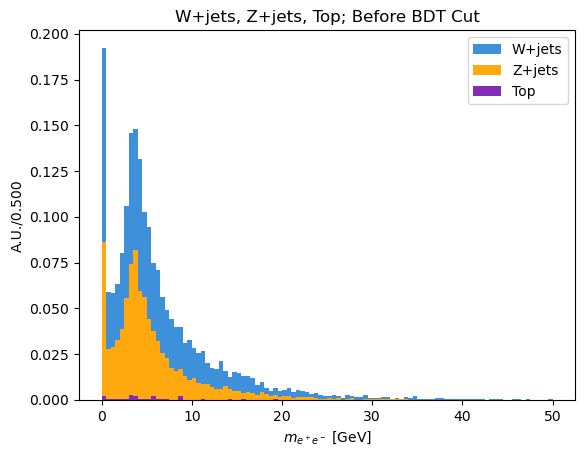

In [98]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes = ['W+jets', 'Z+jets', 'Top'])

plt.title('W+jets, Z+jets, Top; Before BDT Cut')

Text(0.5, 1.0, 'After BDT Cut')

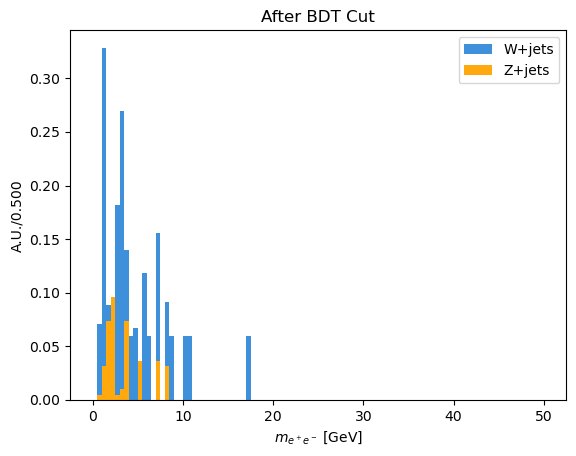

In [95]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut11',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

plt.title('After BDT Cut')

Text(0.5, 1.0, 'W/Z+jets before and after BDT Cut')

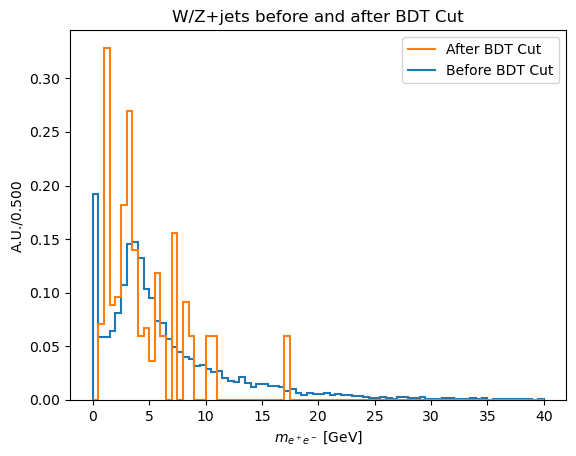

In [106]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,40],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg

plot_dict['cut'] = 'cut10'
style_dict['label'] = 'Before BDT Cut'
ptools.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes = ['W+jets', 'Z+jets'])

plot_dict['cut'] = 'cut11'
style_dict['label'] = 'After BDT Cut'
ptools.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes = ['W+jets', 'Z+jets'])

plt.title('W/Z+jets before and after BDT Cut')

### Plot kinematics: 2D

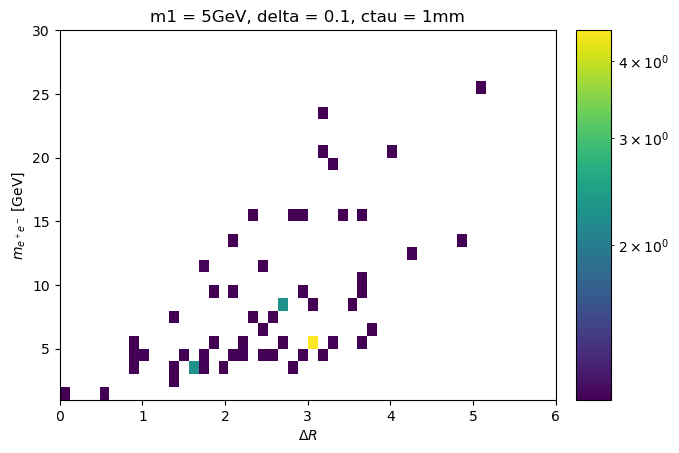

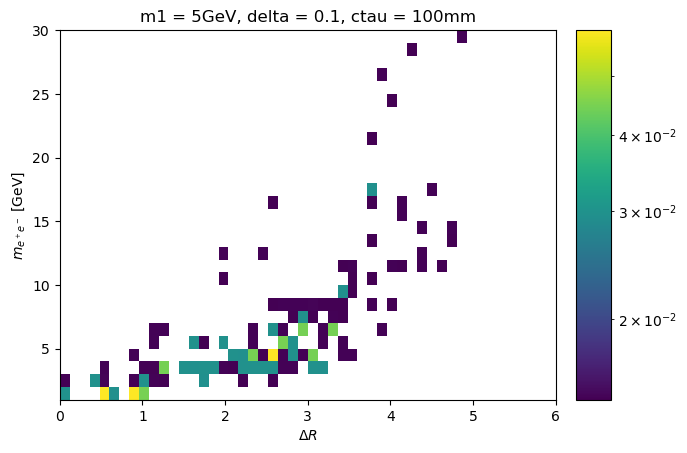

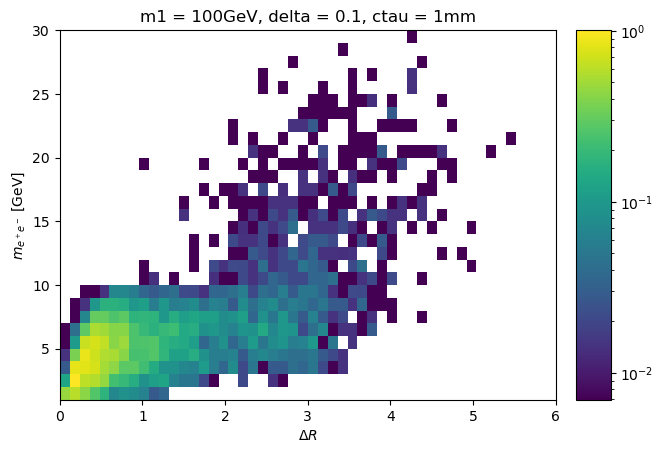

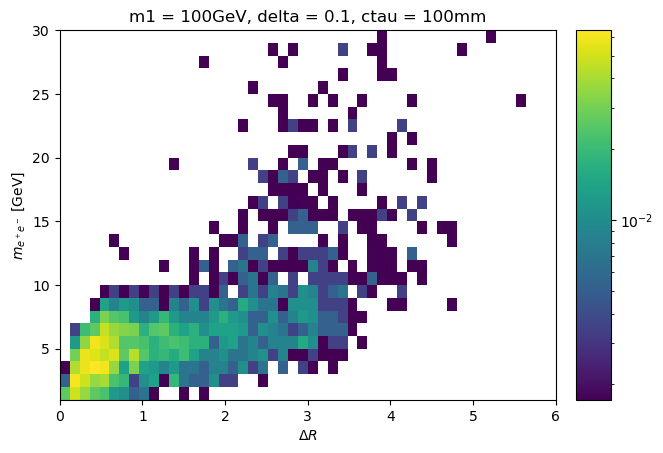

In [102]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_sel_vtx_mass',
    'cut': 'cut10',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            ptools.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

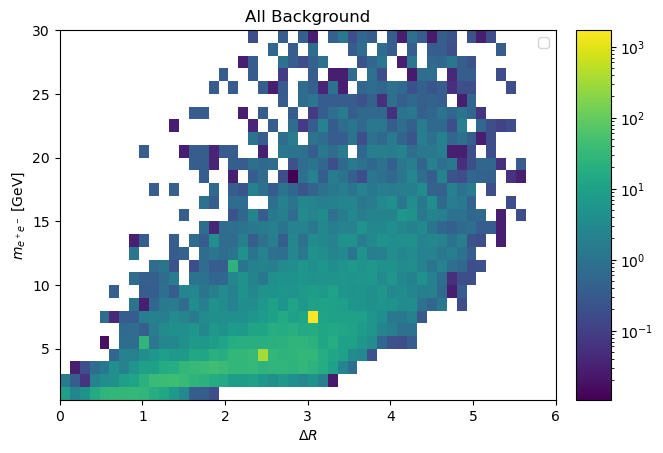

In [99]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_sel_vtx_mass',
    'cut': 'cut10',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])